In [1]:
# MNIST, see reference in https://github.com/G-wave/ANN/blob/master/1_MNIST_Softmax_Keras_Base_Line.ipynb
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

# Add regularization for avoiding overfitting for parameters
from keras import regularizers

# import visualization
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Hyperparameters
NB_EPOCHS = 100
BATCH_SIZE = 128 # 128 test cases: 2^x
NB_CLASSES = 10 # target categories 
VALIDATION_SPLIT = 0.2

In [3]:
# Load Data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


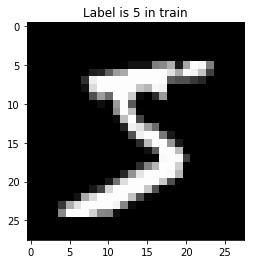

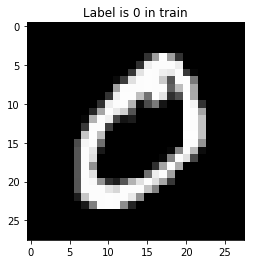

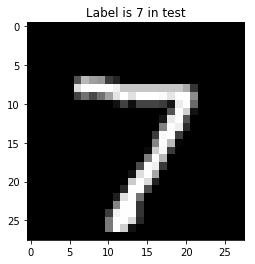

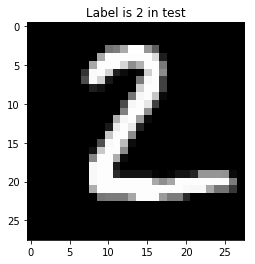

In [5]:
def displayDigit(source_type, x_input, y_input):
    # see reference in https://stackoverflow.com/questions/37228371/visualize-mnist-dataset-using-opencv-or-matplotlib-pyplot
    sample_number = 2
    for i in range(sample_number):
        # Plot
        pixels = x_input[i,:]
        plt.title('Label is {} in {}'.format(y_input[i], source_type))
        plt.imshow(pixels, cmap='gray')
        plt.show()
displayDigit('train', X_train, y_train)
displayDigit('test', X_test, y_test)

In [6]:
# flatten to input of MNIST
valid_row_num = X_train.shape[0]
test_row_num = X_test.shape[0]
column_size = X_train.shape[1] ** 2
X_train = X_train.reshape(valid_row_num, column_size)
X_test = X_test.reshape(test_row_num, column_size)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
print(column_size)
print(valid_row_num)
print(test_row_num)

784
60000
10000


In [8]:
# normalization
X_train /= 255
X_test /= 255

In [9]:
# Convert class into one-hot encoding
Y_train = keras.utils.to_categorical(y_train, NB_CLASSES)
Y_test = keras.utils.to_categorical(y_test, NB_CLASSES)

In [10]:
# Build the model
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(column_size,)))
model.add(Activation('softmax'))

In [11]:
# accuracy
model.compile(loss='categorical_crossentropy',optimizer=SGD(), metrics=['accuracy'])

In [12]:
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCHS, verbose = 1, 
                   validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s - loss: 1.2832 - acc: 0.6997 - val_loss: 0.8124 - val_acc: 0.8284
Epoch 2/100
60000/60000 [==============================] - 1s - loss: 0.7188 - acc: 0.8390 - val_loss: 0.6084 - val_acc: 0.8583
Epoch 3/100
60000/60000 [==============================] - 1s - loss: 0.5891 - acc: 0.8578 - val_loss: 0.5263 - val_acc: 0.8720
Epoch 4/100
60000/60000 [==============================] - 1s - loss: 0.5267 - acc: 0.8676 - val_loss: 0.4802 - val_acc: 0.8796
Epoch 5/100
60000/60000 [==============================] - 1s - loss: 0.4887 - acc: 0.8747 - val_loss: 0.4502 - val_acc: 0.8844
Epoch 6/100
60000/60000 [==============================] - 1s - loss: 0.4626 - acc: 0.8791 - val_loss: 0.4289 - val_acc: 0.8886
Epoch 7/100
60000/60000 [==============================] - 1s - loss: 0.4434 - acc: 0.8828 - val_loss: 0.4126 - val_acc: 0.8911
Epoch 8/100
60000/60000 [=============================

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[0.28219739111065867, 0.92000000000000004]

In [17]:
import os
# save model - https://github.com/fchollet/keras/issues/4875
# example - https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
save_dir = os.path.join(os.getcwd(), 'models')
model_name = 'keras_minst_1layer_softmax_trained_model.h5'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
del model

In [18]:
from keras.models import load_model
model = load_model(model_path)
score_by_reload = model.evaluate(X_test, Y_test, verbose=0)
score == score_by_reload

True